In [157]:
import numpy as np
import pandas as pd
from pandas_datareader import data as pdr
import yfinance as yf
import FinanceDataReader as fdr #pip3 install --user finance-datareader
from fredapi import Fred
import datetime, os


In [158]:
#ticker='msft aapl goog'#'SPY'
tickers=['QQQ','GLD']
yf.pdr_override()
df_price = pdr.get_data_yahoo(tickers)
df_price.isnull().sum()
df_price.dropna(axis=0,inplace=True)

[*********************100%***********************]  2 of 2 completed


In [159]:
start = df_price.index[0] 
end   = df_price.index[-1]
df_new_index = pd.date_range(start,end)
df_price = df_price.reindex(df_new_index)

df_price.isna().sum()
df_price.replace(np.NaN, 0, inplace=True)
df_price[0:10]

Adj Close                 Close                  High             \
                  GLD        QQQ        GLD        QQQ        GLD        QQQ   
2004-11-18  44.380001  34.003864  44.380001  39.290001  44.490002  39.360001   
2004-11-19  44.779999  33.475956  44.779999  38.680000  44.919998  39.290001   
2004-11-20   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
2004-11-21   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
2004-11-22  44.950001  33.796165  44.950001  39.049999  44.970001  39.070000   
2004-11-23  44.750000  33.744244  44.750000  38.990002  44.919998  39.150002   
2004-11-24  45.049999  34.038498  45.049999  39.330002  45.049999  39.389999   
2004-11-25   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
2004-11-26  45.290001  33.934631  45.290001  39.209999  45.599998  39.480000   
2004-11-27   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   

                  Low                  Open                 Volume  \
                  GLD        QQQ        GLD        QQQ         GLD   
2004-11-18  44.070000  38.889999  44.430000  38.980000   5992000.0   
2004-11-19  44.470001  38.590000  44.490002  39.240002  11655300.0   
2004-11-20   0.000000   0.000000   0.000000   0.000000         0.0   
2004-11-21   0.000000   0.000000   0.000000   0.000000         0.0   
2004-11-22  44.740002  38.480000  44.750000  38.610001  11996000.0   
2004-11-23  44.720001  38.610001  44.880001  39.009998   3169200.0   
2004-11-24  44.790001  39.070000  44.930000  39.090000   6105100.0   
2004-11-25   0.000000   0.000000   0.000000   0.000000         0.0   
2004-11-26  45.060001  39.169998  45.250000  39.369999   3097700.0   
2004-11-27   0.000000   0.000000   0.000000   0.000000         0.0   

                         
                    QQQ  
2004-11-18   94901100.0  
2004-11-19  118448900.0  
2004-11-20          0.0  
2004-11-21          0.0  
2004-11-22   79882600.0  
2004-11-23   91925300.0  
2004-11-24   74051700.0  
2004-11-25          0.0  
2004-11-26   31248900.0  
2004-11-27          0.0

In [160]:
for today in df_price.index[1:]:
  for col in df_price.columns.values:
    if df_price[col][today] == 0:
      df_price[col][today] = df_price[col][today-datetime.timedelta(days=1)]

df_price[0:10]

Adj Close                 Close                  High             \
                  GLD        QQQ        GLD        QQQ        GLD        QQQ   
2004-11-18  44.380001  34.003864  44.380001  39.290001  44.490002  39.360001   
2004-11-19  44.779999  33.475956  44.779999  38.680000  44.919998  39.290001   
2004-11-20  44.779999  33.475956  44.779999  38.680000  44.919998  39.290001   
2004-11-21  44.779999  33.475956  44.779999  38.680000  44.919998  39.290001   
2004-11-22  44.950001  33.796165  44.950001  39.049999  44.970001  39.070000   
2004-11-23  44.750000  33.744244  44.750000  38.990002  44.919998  39.150002   
2004-11-24  45.049999  34.038498  45.049999  39.330002  45.049999  39.389999   
2004-11-25  45.049999  34.038498  45.049999  39.330002  45.049999  39.389999   
2004-11-26  45.290001  33.934631  45.290001  39.209999  45.599998  39.480000   
2004-11-27  45.290001  33.934631  45.290001  39.209999  45.599998  39.480000   

                  Low                  Open                 Volume  \
                  GLD        QQQ        GLD        QQQ         GLD   
2004-11-18  44.070000  38.889999  44.430000  38.980000   5992000.0   
2004-11-19  44.470001  38.590000  44.490002  39.240002  11655300.0   
2004-11-20  44.470001  38.590000  44.490002  39.240002  11655300.0   
2004-11-21  44.470001  38.590000  44.490002  39.240002  11655300.0   
2004-11-22  44.740002  38.480000  44.750000  38.610001  11996000.0   
2004-11-23  44.720001  38.610001  44.880001  39.009998   3169200.0   
2004-11-24  44.790001  39.070000  44.930000  39.090000   6105100.0   
2004-11-25  44.790001  39.070000  44.930000  39.090000   6105100.0   
2004-11-26  45.060001  39.169998  45.250000  39.369999   3097700.0   
2004-11-27  45.060001  39.169998  45.250000  39.369999   3097700.0   

                         
                    QQQ  
2004-11-18   94901100.0  
2004-11-19  118448900.0  
2004-11-20  118448900.0  
2004-11-21  118448900.0  
2004-11-22   79882600.0  
2004-11-23   91925300.0  
2004-11-24   74051700.0  
2004-11-25   74051700.0  
2004-11-26   31248900.0  
2004-11-27   31248900.0

In [161]:
trading_df = pd.DataFrame(df_price['Close'])

etfs = trading_df.columns.values

for etf in etfs:
  trading_df[etf+'_qty']     = 0
  trading_df[etf+'_capital'] = 0
trading_df[0:10]

,GLD,QQQ,GLD_qty,GLD_capital,QQQ_qty,QQQ_capital
2004-11-18,44.380001,39.290001,0,0,0,0
2004-11-19,44.779999,38.680000,0,0,0,0
2004-11-20,44.779999,38.680000,0,0,0,0
2004-11-21,44.779999,38.680000,0,0,0,0
2004-11-22,44.950001,39.049999,0,0,0,0
2004-11-23,44.750000,38.990002,0,0,0,0
2004-11-24,45.049999,39.330002,0,0,0,0
2004-11-25,45.049999,39.330002,0,0,0,0
2004-11-26,45.290001,39.209999,0,0,0,0
2004-11-27,45.290001,39.209999,0,0,0,0


In [162]:
import datetime
from dateutil import relativedelta

def get_pivot(year, month, day):
  pivot_date = datetime.datetime.strptime("%d-%d-%d"%(year,month,day), "%Y-%m-%d")
  return pivot_date

def get_next_month(today:datetime):
    nextmonth = today + relativedelta.relativedelta(months=1)
    return nextmonth

def set_reblancing_date(trading_df, start_date, end_date):
  # Set pivot
  trading_df['Pivot'] = 0
  trading_df.loc[start_date,'Pivot'] = 1
  trading_df.loc[end_date,'Pivot'] = 1
  iter_date = start_date
  while iter_date <= end_date:
    AW_4_  = (iter_date.month==4)
    AW_11_ = (iter_date.month==11)
    if (AW_4_ or AW_11_):
      pivot_date = get_pivot(iter_date.year,iter_date.month,28)
      trading_df.loc[pivot_date,'Pivot'] = 1 
    iter_date = get_next_month(iter_date)
  return trading_df

In [163]:
# Sim Env
start_date = datetime.datetime.strptime('2020-01-03', '%Y-%m-%d')
end_date = datetime.datetime.strptime('2022-01-03', '%Y-%m-%d')
period = (start_date <= trading_df.index) & (end_date >= trading_df.index)
trading_df = trading_df.loc[period]

init_capital = 1_000_000

trading_df = set_reblancing_date(trading_df,start_date, end_date)


GLD               168.330002
QQQ               401.679993
GLD_qty          3427.000000
GLD_capital    576866.916275
QQQ_qty          2334.000000
QQQ_capital    937521.102905
Pivot               1.000000
Name: 2022-01-03 00:00:00, dtype: float64

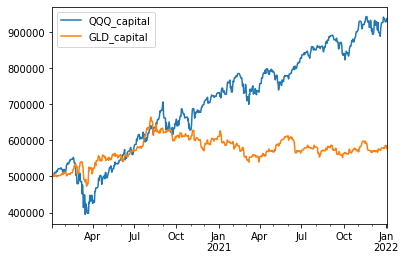

In [182]:
def buy_portpolio(trading_df, init_capital ,etfs):
  # Buy portpolio
  capital = init_capital
  ratios = [0.5, 0.5]
  budgets = (np.ones(len(etfs))*capital)*ratios
  qtys   = (budgets/ trading_df.loc[trading_df.index[0],etfs].values).astype(int)

  for i, etf in enumerate(etfs):
    trading_df.loc[:, etf+'_qty'] = qtys[i] 
    trading_df[etf+'_capital'] = trading_df[etf+'_qty']*trading_df[etf]
  return trading_df

trading_df = buy_portpolio(trading_df, init_capital, etfs)
#trading_df[etfs].plot()

trading_df[['QQQ_capital', 'GLD_capital']].plot()
trading_df.iloc[-1]

GLD               168.330002
QQQ               401.679993
GLD_qty          4404.000000
GLD_capital    741325.328064
QQQ_qty          1878.000000
QQQ_capital    754355.026245
Pivot               1.000000
Name: 2022-01-03 00:00:00, dtype: float64

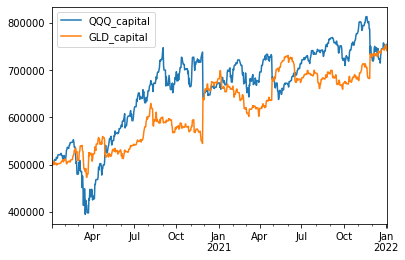

In [183]:
# Reblancing
index = trading_df.loc[trading_df['Pivot']==True,:].index.values

for i in range(len(index)-1):
  period = (index[i] <= trading_df.index) & (index[i+1] >= trading_df.index)
  quater_df = trading_df.loc[period,:].copy()
  
  quater_capital = 0
  for etf in etfs:
    quater_capital = quater_capital + quater_df.iloc[0].xs(etf+'_capital')
  quater_df = buy_portpolio(quater_df, quater_capital, etfs)

  trading_df.loc[period,:] = quater_df

trading_df[['QQQ_capital', 'GLD_capital']].plot()
trading_df.iloc[-1]